# Task 3:  Forest Cover Type Classification 
**Description:**
 * **Dataset (Recommended):** Covertype (UCI)
 * Predict the type of forest cover based on cartographic and environmental features
 * Clean and preprocess the data including categorical handling
 * Train and evaluate multi-class classification models
 * Visualize confusion matrix and feature importance
 
 **Tools & Libraries:**
 1. Python
 2. Pandas
 3. Scikit-learn
 4. XGBoost
 
 **Covered Topics**
 * Multi-class classification
 * Tree-based modeling
 
 **Bonus:**
 * Compare different models (e.g., Random Forest vs. XGBoost)
 * Perform hyperparameter tuning

In [2]:
# Task 3: Forest Cover Type Classification

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [4]:
# 2. Define output directory
output_dir = './outputs'
os.makedirs(output_dir, exist_ok=True)

# 3. Load dataset
file_path = '/kaggle/input/covertype-forest-cover-types/covertype.csv'
df = pd.read_csv(file_path)

In [5]:
# 4. Explore data
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target distribution:\n", df['Cover_Type'].value_counts())

# 5. Check missing values
print("\nMissing values:\n", df.isnull().sum())

# 6. Select features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']


Dataset shape: (581012, 55)
Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
Target distribution:
 Cover_Type
2    283301
1    211840
3     35754


In [6]:
# 7. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



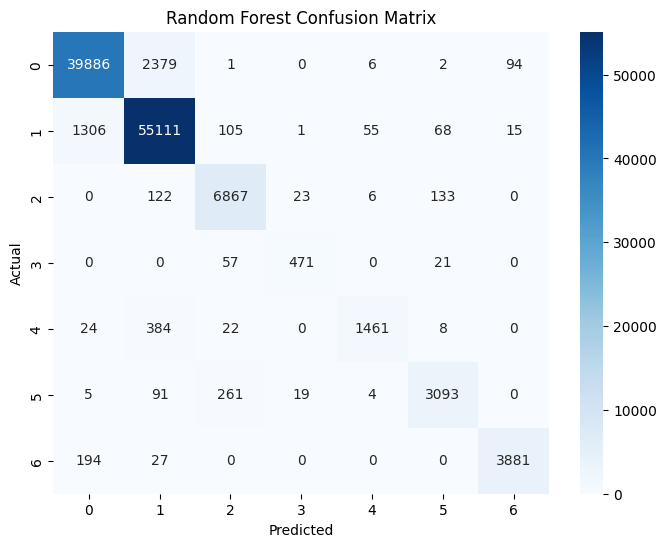

In [7]:
# 9. Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 10. Evaluate Random Forest
rf_pred = rf_clf.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

# 11. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_dir, 'rf_confusion_matrix.png'))
plt.show()


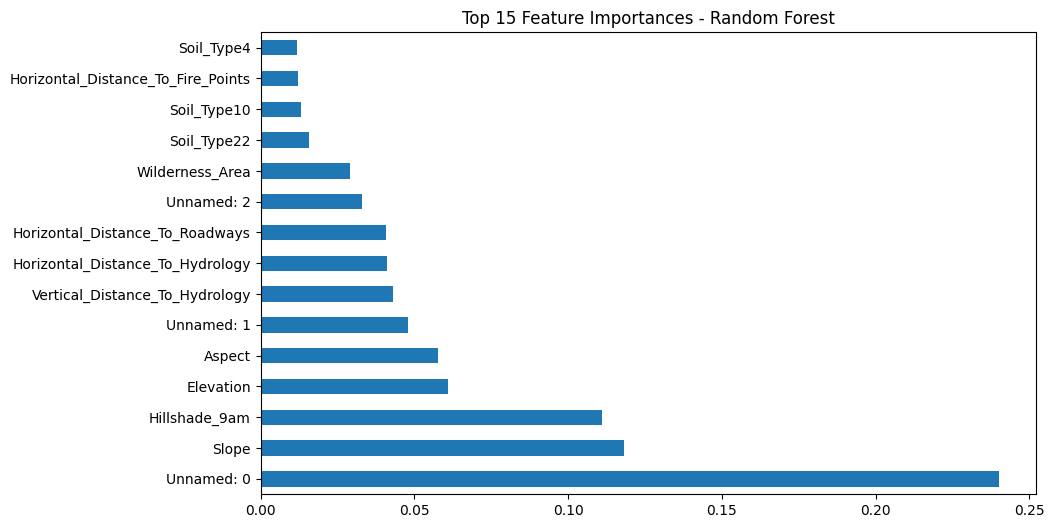

In [9]:
# 12. Feature Importance - Random Forest
importances_rf = pd.Series(rf_clf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances_rf.head(15).plot(kind='barh')
plt.title('Top 15 Feature Importances - Random Forest')
plt.savefig(os.path.join(output_dir, 'rf_feature_importance.png'))
plt.show()


XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.88      0.86      0.87       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



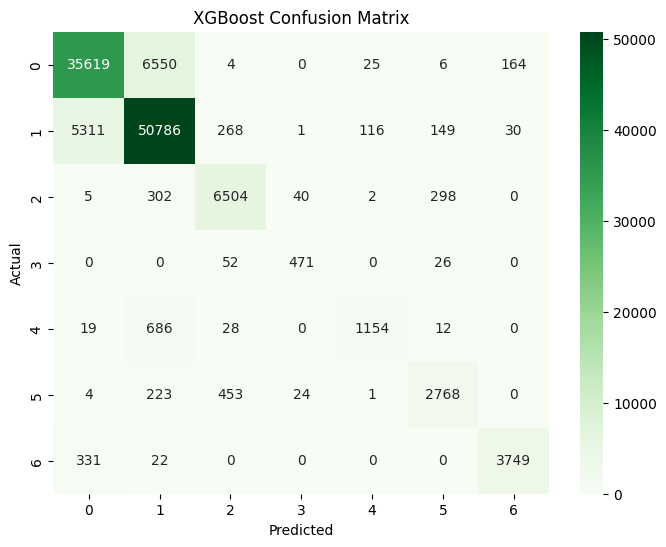

In [10]:
# Adjust target labels
y_adj = y - 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_adj, test_size=0.2, random_state=42, stratify=y_adj)

# Train XGBoost
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=len(y_adj.unique()), eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict and adjust back
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_original = xgb_pred + 1

# Evaluate
print("\nXGBoost Classification Report:\n", classification_report(y_test + 1, xgb_pred_original))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test + 1, xgb_pred_original)
plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_dir, 'xgb_confusion_matrix.png'))
plt.show()


<Figure size 1000x800 with 0 Axes>

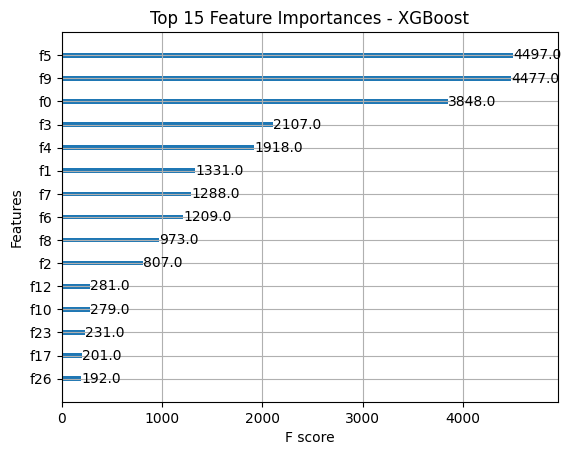

In [11]:
# 16. Feature Importance - XGBoost
plt.figure(figsize=(10,8))
plot_importance(xgb_clf, max_num_features=15)
plt.title('Top 15 Feature Importances - XGBoost')
plt.savefig(os.path.join(output_dir, 'xgb_feature_importance.png'))
plt.show()


In [12]:
# 17. BONUS: Hyperparameter Tuning - Random Forest 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})


Best Parameters from GridSearchCV (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.85      0.88       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



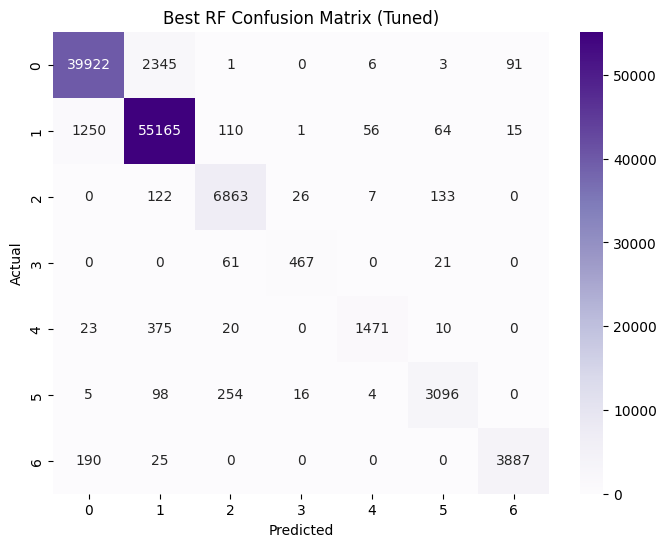

In [13]:
print("\nBest Parameters from GridSearchCV (Random Forest):", grid_search.best_params_)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
print("\nClassification Report after Hyperparameter Tuning:\n", classification_report(y_test, best_rf_pred))

# 18. Save final tuned model performance and feature importance
cm_best_rf = confusion_matrix(y_test, best_rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Purples')
plt.title('Best RF Confusion Matrix (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_dir, 'best_rf_confusion_matrix.png'))
plt.show()

In [14]:
importances_best_rf = pd.Series(best_rf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
importances_best_rf.to_csv(os.path.join(output_dir, 'best_rf_feature_importance.csv'))

# 19. Save processed data and results
pd.DataFrame(X_scaled, columns=df.columns[:-1]).to_csv(os.path.join(output_dir, 'scaled_features.csv'), index=False)
df.to_csv(os.path.join(output_dir, 'original_dataset_with_target.csv'), index=False)

print("\n✅ All graphs, models, and data saved in 'outputs' directory.")


✅ All graphs, models, and data saved in 'outputs' directory.
